## Normality Tests
Analizan si los datos difieren o no de una distribución normal.

Usar estadística paramétrica o no paramétrica.

Métodos gráficos:
* Histograma (Curva normal)
* Gráfico de cuantiles 

Métodos analíticos:
* Asimetría y Curtosis
* Shapiro-Wilk
* Kolmogorov-Smirnov
* Jarque-Bera: Cuantifica qué tanto se desvían los coeficientes de asimetría y curtosis esperadas en una distribución normal.

#### Kolmogorov-Smirnov 
n > 50

The Kolmogorov-Smirnov test is used to test whether or not or not a sample comes from a certain distribution.

To perform a Kolmogorov-Smirnov test in Python we can use the scipy.stats.kstest() for a one-sample test or scipy.stats.ks_2samp() for a two-sample test.



In [22]:
from numpy.random import seed
from numpy.random import poisson

#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)

from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(data, 'norm')
# We can reject Ho, Ho: Distribution is normal, so distribution is not normal

KstestResult(statistic=0.9072498680518208, pvalue=1.0908062873170218e-103)

In [23]:
# Two Sample Kolmogorov Smirnov
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
data1 = randn(100)
data2 = lognormal(3, 1, 100)

from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
ks_2samp(data1, data2)

KstestResult(statistic=0.99, pvalue=4.417521386399011e-57)

#### Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [1]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


#### D'Agostinos K^2 Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.


In [3]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


#### Anderson-Darling Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [4]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


## Correlation tests

#### Person s Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [5]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


#### Spearman's Rank Correlation
Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [6]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


#### Kendall's Rank Correlation
Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [25]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


#### Chi-Squared Test
Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.

25 or more examples in each cell of the contingency table.
Interpretation


* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [24]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


## Stationary Tests
This section lists statistical tests that you can use to check if a time series is stationary or not.

Qué es una serie estacionaria

Se dice que una serie de tiempo es estacionaria cuando su distribución y sus parámetros no varían con el tiempo.

En términos más concretos, la media y la varianza de una serie estacionaria no cambian con el tiempo, y tampoco siguen una tendencia.

Si lo ilustramos con las siguientes imágenes, lo podrás ver de una forma mucho más clara:
* Media constante
* Homoscedasticidad
* AutoCovarianza

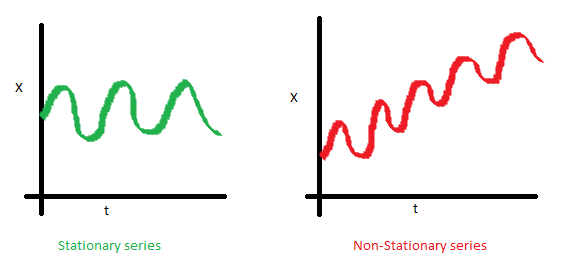

In [51]:
from IPython.display import Image
Image(filename='media_estacionaria.png')

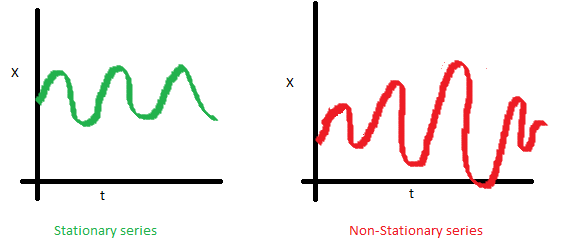

In [52]:
from IPython.display import Image
Image(filename='homoscedasticidad.png')

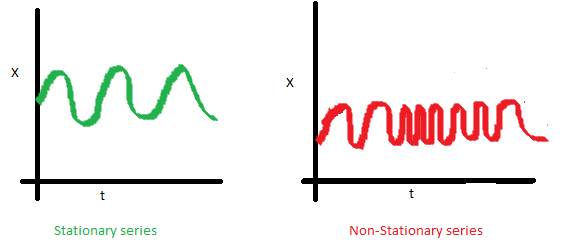

In [53]:
from IPython.display import Image
Image(filename='autocovarianza.png')

#### Augmented Dickey-Fuller Unit Root Test
Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

Assumptions

Observations in are temporally ordered.
Interpretation

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).


In [8]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


#### Kwiatkowski-Phillips-Schmidt-Shin
Tests whether a time series is trend stationary or not.

Assumptions

Observations in are temporally ordered.
Interpretation

* H0: the time series is not trend-stationary.
* H1: the time series is trend-stationary.

In [10]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


## Parametric Statistical Hypothesis Tests
This section lists statistical tests that you can use to compare data samples.

#### z-test
Z-test is a test for the proportions. In other words this is a statistical test that helps us evaluate our beliefs about certain proportions in the population based on the sample at hand.

* The sample size should be greater than 30. Otherwise, we should use the t-test.
* Samples should be drawn at random from the population.
* The standard deviation of the population should be known.
Samples that are drawn from the population should be independent of each other.
* The data should be normally distributed, however for large sample size, it is assumed to have a normal distribution.


In [19]:

import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
  
# Generate a random array of 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
mean_iq = 110
sd_iq = 15/math.sqrt(50)
alpha =0.05
null_mean =100
data = sd_iq*randn(50)+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

mean=109.35 stdv=1.94
Reject Null Hypothesis


#### Student’s t-test
Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [11]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


#### Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Observations across each sample are paired.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [12]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


#### Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

In [13]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


#### Tukey’s multiple comparisons
Use pairwise_tukeyhsd(endog, groups, alpha=0.05) for tuky’s HSD(honestly significant difference) test. Argument endog is response variable, array of data (A[0] A[1]… A[6] B[1] … B[6] C[1] … C[6]). Argument groups is list of names(A, A…A, B…B, C…C) that corresponds to response variable. Alpha is significance level

In [49]:
import numpy as np
import scipy.stats as stats

# Create four random groups of data with a mean difference of 1

mu, sigma = 10, 3 # mean and standard deviation
group1 = np.random.normal(mu, sigma, 50)

mu, sigma = 11, 3 # mean and standard deviation
group2 = np.random.normal(mu, sigma, 50)

mu, sigma = 12, 3 # mean and standard deviation
group3 = np.random.normal(mu, sigma, 50)

mu, sigma = 13, 3 # mean and standard deviation
group4 = np.random.normal(mu, sigma, 50)

# Show the results for Anova

F_statistic, pVal = stats.f_oneway(group1, group2, group3, group4)

print ('P value:')
print (pVal)

# Put into dataframe

df = pd.DataFrame()
df['treatment1'] = group1
df['treatment2'] = group2
df['treatment3'] = group3
df['treatment4'] = group4

# Stack the data (and rename columns):

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'treatment',
                                            0:'result'})
# Show the first 8 rows:

print (stacked_data.head(8))

P value:
3.543602472936658e-05
   id   treatment     result
0   0  treatment1   8.892454
1   0  treatment2  12.563195
2   0  treatment3   8.080419
3   0  treatment4  10.707568
4   1  treatment1   9.281862
5   1  treatment2   9.272636
6   1  treatment3  16.974392
7   1  treatment4   8.686626


In [50]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['treatment'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
treatment1 treatment2    1.393 0.0721 -0.0827 2.8688  False
treatment1 treatment3   1.7806 0.0109  0.3049 3.2563   True
treatment1 treatment4    2.787  0.001  1.3113 4.2628   True
treatment2 treatment3   0.3876    0.9 -1.0882 1.8633  False
treatment2 treatment4    1.394 0.0718 -0.0817 2.8697  False
treatment3 treatment4   1.0064 0.2925 -0.4693 2.4822  False
-----------------------------------------------------------


In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
groups=['A','B','C']

print("1st try:")
try:
        print(pairwise_tukeyhsd(data,groups, alpha=0.05))
except ValueError as ve:
        print("whoops!", ve)


print("2nd try:")
try:
        print( pairwise_tukeyhsd(data, groups, alpha=0.05))
except ValueError as ve:
        print("whoops!", ve)

1st try:
whoops! v must be > 1 when p >= .9
2nd try:
whoops! v must be > 1 when p >= .9


/home/jp/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/jp/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test
Tests whether the distributions of two independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [14]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


#### Wilcoxon Signed-Rank Test
Tests whether the distributions of two paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.

Observations across each sample are paired.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [15]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


#### Kruskal-Wallis H Test
Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

In [16]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


#### Friedman Test
Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample can be ranked.

Observations across each sample are paired.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

In [18]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
